# <center style='color:salmon'>`Bernoulli Naive Bayes` using Scikit-Learn</center>

# 1. Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

# 2. Load `zoo` dataset

In [2]:
df = pd.read_csv('zoo.csv')
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.shape

(101, 17)

In [4]:
df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [5]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

# 3. Separate features and labels

In [6]:
X = df.drop(['legs', 'type'], axis=1)
y = df['type']

# 4. Split the dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, train_size=0.67, random_state=42)

In [8]:
len(X_train), len(X_test), len(y_train), len(y_test)

(67, 34, 67, 34)

# 5. Apply `Bernoulli Naive Bayes`

In [9]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [10]:
print('Accuracy on the test set:', round(bnb.score(X_test, y_test), 4))

Accuracy on the test set: 0.9118


# 6. Plot `confusion_matrix`

In [11]:
y_pred = bnb.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=bnb.classes_)

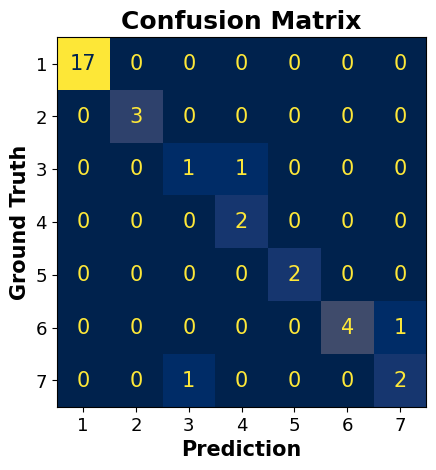

In [12]:
disp.plot(cmap='cividis', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [13]:
print('F1 score:', round(metrics.f1_score(y_test, y_pred, average='weighted'), 4))
print('Jaccard score:', round(metrics.jaccard_score(y_test, y_pred, average='weighted'), 4))

F1 score: 0.9131
Jaccard score: 0.8676


# 7. Print `classification_report`

In [14]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         3
           3       0.50      0.50      0.50         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      0.80      0.89         5
           7       0.67      0.67      0.67         3

    accuracy                           0.91        34
   macro avg       0.83      0.85      0.84        34
weighted avg       0.92      0.91      0.91        34

